In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [43]:
if os.path.split(os.getcwd())[-1] == 'notebooks': os.chdir(os.path.split(os.getcwd())[-2])
print(os.getcwd())

/home/fitzaudoen/apps/gas-sensor-analytics-demo


In [44]:
sns.set()
sns.set_context('talk')

# Prepare data

In [45]:
df = pd.read_pickle('data/processed/train_data.pkl')

In [46]:
data = df.values
batch_id = data[:,0]
y = data[:,1]
X = data[:,3:]
cols = df.columns.values

In [47]:
scaler = pickle.load(
    open('models/preprocessing/scaler.pkl','rb')
)
pca = pickle.load(
    open('models/preprocessing/pca.pkl','rb')
)

In [48]:
X = scaler.transform(X)
X_pca = pca.transform(X)

In [49]:
cv_df = pd.read_pickle('data/processed/cv_data.pkl')

In [50]:
data_cv = cv_df.values
batch_id_cv = data_cv[:,0]
y_cv = data_cv[:,1]
X_cv = scaler.transform(data_cv[:,3:])
X_cv_pca = pca.transform(X_cv)
#cols = df.columns.values

# Models without Reduction

## Logistic Regression

In [51]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)
print(clf.score(X,y))

0.9959096858638743


In [52]:
# Score of cross validation set
print(clf.score(X_cv,y_cv))

0.9911678115799804


### Set regularization parameter

In [53]:
C_arr_lr = list(range(1,500,50))
scores_varC_lr = []
score_varC_lr_cv = []
for C in C_arr_lr :
    clf = LogisticRegression(random_state=0, max_iter=5000, C=C).fit(X, y)
    scores_varC_lr.append(clf.score(X,y))
    score_varC_lr_cv.append(clf.score(X_cv,y_cv))

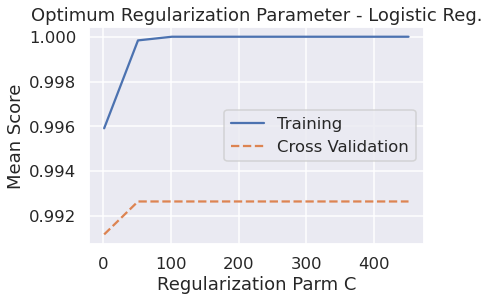

In [54]:
fig, ax = plt.subplots()
ax.plot(C_arr_lr,scores_varC_lr,label='Training')
ax.plot(C_arr_lr,score_varC_lr_cv,'--',label='Cross Validation')
ax.set_xlabel("Regularization Parm C")
ax.set_ylabel('Mean Score')
ax.set_title('Optimum Regularization Parameter - Logistic Reg.')
ax.legend()

# Learning Curve

In [55]:
n_arr_lr = list(range(50,250,25)) + list(range(250,len(X),500))
scores_learn_lr = []
scores_learn_lr_cv = []
for n in n_arr_lr:
    clf = LogisticRegression(random_state=0, max_iter=5000, C=125).fit(X[0:n,:], y[0:n])
    scores_learn_lr.append(clf.score(X[0:n,:],y[0:n]))
    scores_learn_lr_cv.append(clf.score(X_cv,y_cv))

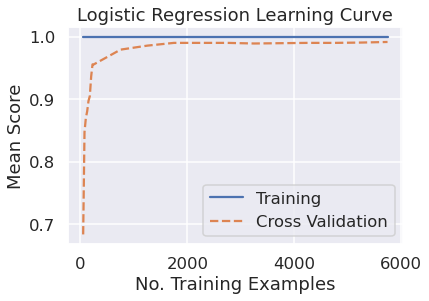

In [56]:
fig, ax = plt.subplots()
ax.plot(n_arr_lr,scores_learn_lr,label='Training')
ax.plot(n_arr_lr,scores_learn_lr_cv,'--',label='Cross Validation')
ax.set_title('Logistic Regression Learning Curve')
ax.set_xlabel('No. Training Examples')
ax.set_ylabel('Mean Score')
ax.legend()

In [57]:
clf =  LogisticRegression(random_state=0, max_iter=5000, C=125)
%timeit clf.fit(X, y)

10.7 s ± 574 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Support Vector Classification

In [58]:
clf = SVC(C=500)

In [59]:
clf.fit(X,y)

SVC(C=500)

In [60]:
clf.score(X,y)

1.0

In [61]:
clf.score(X_cv,y_cv)

0.9965652600588812

In [62]:
C_arr_svm = list(range(1,500,50))
score_arr_svm = []
score_arr_svm_cv = []
for C in C_arr_svm:
    clf = SVC(C=C)
    clf = clf.fit(X, y)
    score_arr_svm.append(clf.score(X,y))
    score_arr_svm_cv.append(clf.score(X_cv,y_cv))


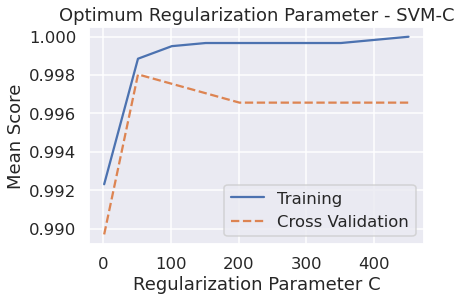

In [63]:
fig, ax = plt.subplots()
ax.plot(C_arr_svm,score_arr_svm, label='Training')
ax.plot(C_arr_svm,score_arr_svm_cv, '--',label='Cross Validation')
ax.set_xlabel('Regularization Parameter C')
ax.set_ylabel('Mean Score')
ax.set_title('Optimum Regularization Parameter - SVM-C')
ax.legend()

In [64]:
n_arr_svm = list(range(50,250,25)) + list(range(250,len(X),500))
score_arr_learn_svm = []
score_arr_learn_svm_cv = []
for n in n_arr_svm:
    clf = SVC(C=C)
    clf = clf.fit(X[0:n,:], y[0:n])
    score_arr_learn_svm.append(clf.score(X[0:n,:],y[0:n]))
    score_arr_learn_svm_cv.append(clf.score(X_cv,y_cv))

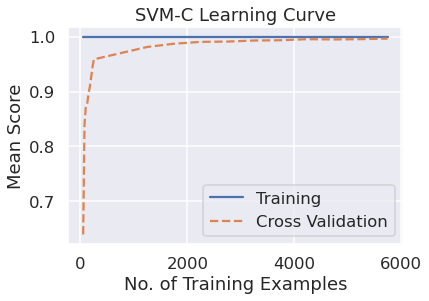

In [65]:
fig, ax = plt.subplots()
ax.plot(n_arr_svm,score_arr_learn_svm, label='Training')
ax.plot(n_arr_svm,score_arr_learn_svm_cv,'--',label='Cross Validation')
ax.set_xlabel('No. of Training Examples')
ax.set_ylabel('Mean Score')
ax.set_title('SVM-C Learning Curve')
ax.legend()

In [66]:
clf = SVC(C=400)
x = %timeit clf.fit(X,y)

553 ms ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
print(x)

None


### Random Forest Classification

In [68]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=20, random_state=0)

In [69]:
clf.score(X,y)

1.0

In [70]:
clf.score(X_cv,y_cv)

0.9911678115799804

In [71]:
list(range(2,20,2))

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [72]:
depth_arr_rf = list(range(2,20,2))
score_arr_rf = []
score_arr_rf_cv = []
for depth in depth_arr_rf:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf = clf.fit(X, y)
    score_arr_rf.append(clf.score(X,y))
    score_arr_rf_cv.append(clf.score(X_cv,y_cv))

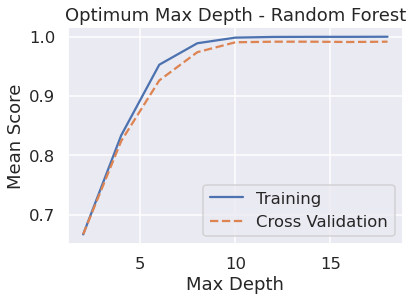

In [73]:
fig, ax = plt.subplots()
ax.plot(depth_arr_rf,score_arr_rf, label='Training')
ax.plot(depth_arr_rf,score_arr_rf_cv, '--',label='Cross Validation')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Mean Score')
ax.set_title('Optimum Max Depth - Random Forest')
ax.legend()

In [74]:
n_arr_rf = list(range(50,250,25)) + list(range(250,len(X),500))
score_arr_learn_rf = []
score_arr_learn_rf_cv = []
for n in n_arr_rf:
    clf = RandomForestClassifier(max_depth=12, random_state=0)
    clf = clf.fit(X[0:n,:], y[0:n])
    score_arr_learn_rf.append(clf.score(X[0:n,:],y[0:n]))
    score_arr_learn_rf_cv.append(clf.score(X_cv,y_cv))

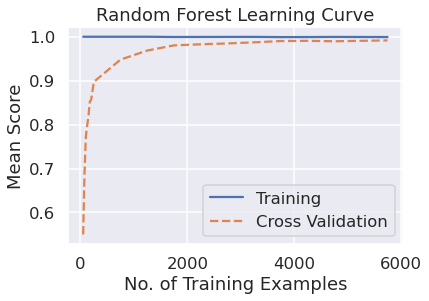

In [75]:
fig, ax = plt.subplots()
ax.plot(n_arr_rf,score_arr_learn_rf, label='Training')
ax.plot(n_arr_rf,score_arr_learn_rf_cv,'--',label='Cross Validation')
ax.set_xlabel('No. of Training Examples')
ax.set_ylabel('Mean Score')
ax.set_title('Random Forest Learning Curve')
ax.legend()

In [76]:
clf = RandomForestClassifier(max_depth=12, random_state=0)
%timeit clf.fit(X,y)

3.02 s ± 49.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Does Changing Parameter Allow less Training Examples?
Since training is ~100% for depth > 12, then can just plot validation curves at different depths and see if it changes

In [77]:
n_arr_rf = list(range(50,250,25)) + list(range(250,len(X),500))
score_arr_learn_rf = []
score_arr_learn_rf_cv = []
for n in n_arr_rf:
    clf = RandomForestClassifier(max_depth=50, random_state=0)
    clf = clf.fit(X[0:n,:], y[0:n])
    score_arr_learn_rf.append(clf.score(X[0:n,:],y[0:n]))
    score_arr_learn_rf_cv.append(clf.score(X_cv,y_cv))

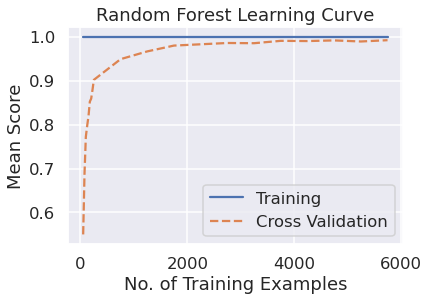

In [78]:
fig, ax = plt.subplots()
ax.plot(n_arr_rf,score_arr_learn_rf, label='Training')
ax.plot(n_arr_rf,score_arr_learn_rf_cv,'--',label='Cross Validation')
ax.set_xlabel('No. of Training Examples')
ax.set_ylabel('Mean Score')
ax.set_title('Random Forest Learning Curve')
ax.legend()

# Comparison Plot

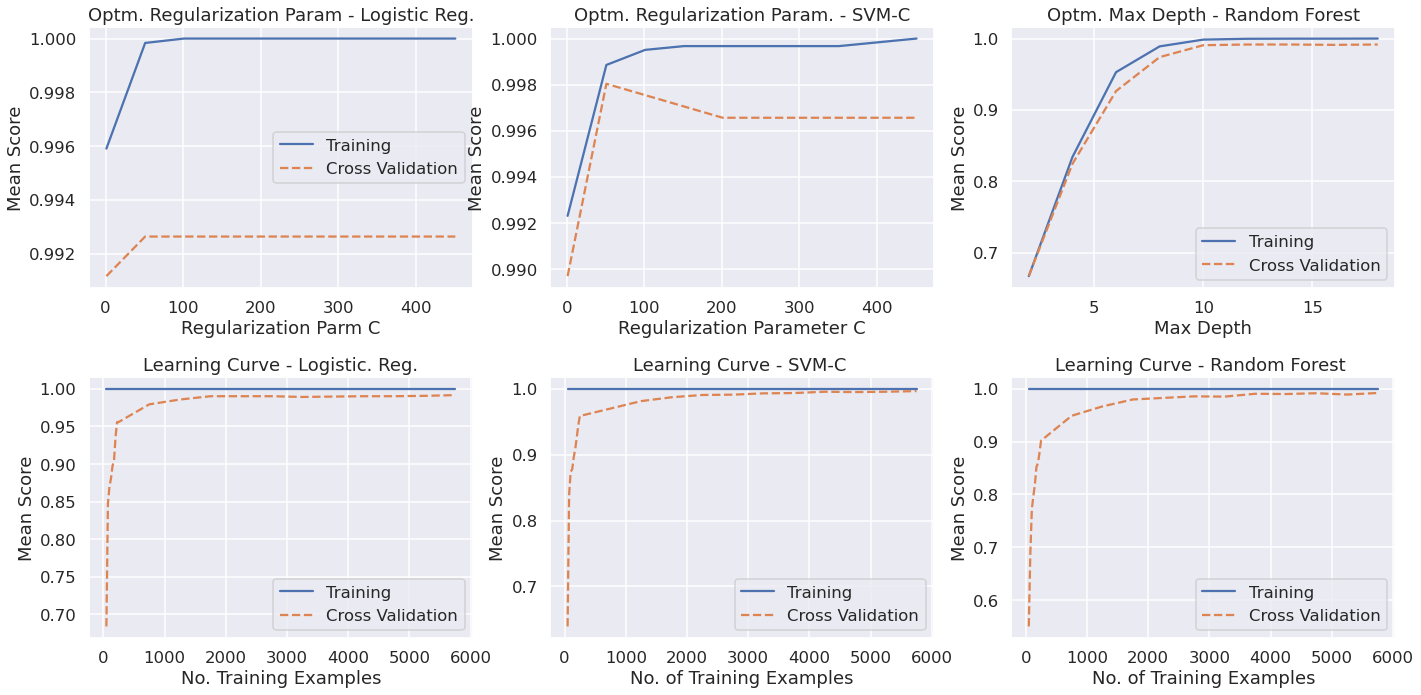

In [79]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

# Logistic Regressionn 
## Set Parameter
ax[0,0].plot(C_arr_lr,scores_varC_lr,label='Training')
ax[0,0].plot(C_arr_lr,score_varC_lr_cv,'--',label='Cross Validation')
ax[0,0].set_xlabel("Regularization Parm C")
ax[0,0].set_ylabel('Mean Score')
ax[0,0].set_title('Optm. Regularization Param - Logistic Reg.')
ax[0,0].legend()
## Learning Curve
ax[1,0].plot(n_arr_lr,scores_learn_lr,label='Training')
ax[1,0].plot(n_arr_lr,scores_learn_lr_cv,'--',label='Cross Validation')
ax[1,0].set_title('Learning Curve - Logistic. Reg.')
ax[1,0].set_xlabel('No. Training Examples')
ax[1,0].set_ylabel('Mean Score')
ax[1,0].legend()
plt.tight_layout()

# SVM-C
## Regularization Parameter
ax[0,1].plot(C_arr_svm,score_arr_svm, label='Training')
ax[0,1].plot(C_arr_svm,score_arr_svm_cv, '--',label='Cross Validation')
ax[0,1].set_xlabel('Regularization Parameter C')
ax[0,1].set_ylabel('Mean Score')
ax[0,1].set_title('Optm. Regularization Param. - SVM-C')

## Learning Curve
ax[1,1].plot(n_arr_svm,score_arr_learn_svm, label='Training')
ax[1,1].plot(n_arr_svm,score_arr_learn_svm_cv,'--',label='Cross Validation')
ax[1,1].set_xlabel('No. of Training Examples')
ax[1,1].set_ylabel('Mean Score')
ax[1,1].set_title('Learning Curve - SVM-C ')
ax[1,1].legend()

# Random Forest Classification
## Max Depth
ax[0,2].plot(depth_arr_rf,score_arr_rf, label='Training')
ax[0,2].plot(depth_arr_rf,score_arr_rf_cv, '--',label='Cross Validation')
ax[0,2].set_xlabel('Max Depth')
ax[0,2].set_ylabel('Mean Score')
ax[0,2].set_title('Optm. Max Depth - Random Forest')
ax[0,2].legend()

## Learning Curve
ax[1,2].plot(n_arr_rf,score_arr_learn_rf, label='Training')
ax[1,2].plot(n_arr_rf,score_arr_learn_rf_cv,'--',label='Cross Validation')
ax[1,2].set_xlabel('No. of Training Examples')
ax[1,2].set_ylabel('Mean Score')
ax[1,2].set_title('Learning Curve - Random Forest ')
ax[1,2].legend()